# <center>Digital Image Processing - Problem Set 4</center>

### Student Names:      
* Karolay Ardila Salazar
* Julián Sibaja García
* Andrés Simancas Mateus

### Instructions

This Problem Set covers the topics of Morphological operations, Region filling, Canny edge detection, Hough Transform, Thresholding, Watershed segmentation, $k$-means segmentation.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

### Definitions

In [1]:
'''This is a definition script, so we do not have to rewrite code'''

import numpy as np
import os
import cv2
import matplotlib.pyplot as mplt
import random


# set matplotlib to print inline (Jupyter)
%matplotlib inline

# path prefix
pth = '../data/'

# files to be used as samples
# list *files* holds the names of the test images
files = sorted(os.listdir(pth))
print files

# Usefull function
def rg(img_path):
    return cv2.imread(pth+img_path, cv2.IMREAD_GRAYSCALE)

['Fall-Nature-Background-Pictures.jpg', 'Fig6.21(b).jpg', 'Woman.bmp', 'blown_ic.png', 'blurry_moon.png', 'building.jpg', 'cameraman.png', 'cameraman_new.png', 'check.png', 'chest.jpg', 'ckt_board_saltpep_prob_pt05.png', 'connected.jpg', 'contact_lens_original.png', 'crosses.png', 'darkPollen.jpg', 'dark_fountain.jpg', 'face.png', 'fingerprint.jpg', 'flower.jpg', 'fruits.jpg', 'hiro.jpg', 'hut.jpg', 'lena.jpg', 'lightPollen.jpg', 'lowContrastPollen.jpg', 'mms.jpg', 'moon.jpg', 'new_cameraman.png', 'new_chest.bmp', 'noisy_fingerprint.jpg', 'out.png', 'pollen.jpg', 'rectangle.png', 'rose.bmp', 'runway.jpg', 'skull.bmp', 'small_blobs.jpg', 'spheres.jpg', 'spine.jpg', 'squares.jpg', 'steve_blog.png', 'test_pattern_blurring_orig.png', 'translated_rectangle.png', 'weld_x-ray.jpg']


## Problem 1

Write a function that performs the following sequence of morphological operations on a binary image and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Erode the input image.
3. Dilate the result of b.
4. Dilate the result of c.
5. Erode the result of d.

Write a second function that performs the following operations and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Perform opening of the input image.
3. Compute the closing of the result from b.

Apply both functions to the image <tt>noisy_fingerprint.jpg</tt>. Discuss the differences and similarities between the final results of using both functions.


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

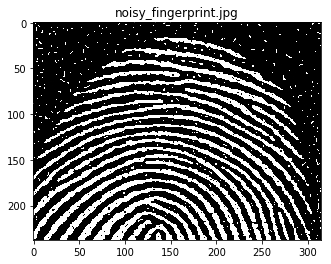

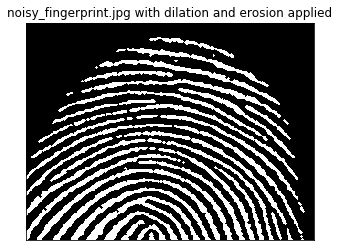

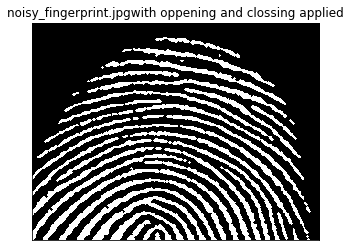

In [6]:
def erotionNDilation(img):
    # Structuring element
    se = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
    # Applying Erotion first time
    img_morphed = cv2.erode(img,se,iterations = 1)
    # Applying Dilation 2 times
    img_morphed = cv2.dilate(img_morphed,se,iterations = 2)
    # Applying Erotion Second time
    img_morphed = cv2.erode(img_morphed,se,iterations = 1)
    
    return img_morphed

def oppNCloss(img):
    # Structuring element
    se = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
    # Performing oppening
    img_morphed = cv2.morphologyEx(img, cv2.MORPH_OPEN, se)
    # Performing Clossing
    img_morphed = cv2.morphologyEx(img_morphed, cv2.MORPH_CLOSE, se)
    return img_morphed 

img_name = files[29]
img = cv2.imread('../data/'+img_name,0)
img_ero_dil = erotionNDilation(img)
img_opp_closs = oppNCloss(img)

# Plotting
mplt.imshow(img, cmap='gray'),mplt.title(img_name)
mplt.figure()
mplt.imshow(img_ero_dil, cmap='gray'),mplt.title(img_name+" with dilation and erosion applied")
mplt.xticks([]), mplt.yticks([])
mplt.figure()
mplt.imshow(img_opp_closs, cmap='gray'),mplt.title(img_name+"with oppening and clossing applied")
mplt.xticks([]), mplt.yticks([])    

## Problem 2

Write a function that implements the region filling function discussed in class.
In this function you will need to use an interactive plot, so we need to disable <tt>inline</tt> plotting. This can be done with the following code:

In [5]:
%matplotlib qt
# wx, gtk, osx or tk


The algorithm should proceed as follows:

1. Open and display the input binary image.
2. Using the <tt>plt.ginput</tt> function, specify a pixel within the region that you want to fill. Record the $(x, y)$ coordinate of the selected pixel.
3. Generate $X_0$, a binary image whose size is equal to the size of the input image. The pixel at the coordinate selected in the previous step should be set to 1, all other pixels should be set to zero.
4. Compute $X_k$ according to the following equation. Repeat until convergence, i.e. $X_k = X_{k-1}$
\begin{equation}
X_k=(X_{k-1} ⊕ B) ∩ A^c
\end{equation}

5. Compute the union between the final $X_k$ and the original image to fill the region.

Apply your function to the image <tt>spheres.jpg</tt> to fill in all the black circles.


## Problem 3

Connected component labeling (also known as connected component analysis, blob extraction, region labeling, blob discovery, or region extraction) is an algorithm that uniquely labels connected components. The definition of connected components depends on the type of pixel adjacency used (pixel adjacency is defined and described in the book). In this problem, we will look at how the result of a connected component labeling algorithm changes when using 4-adjacency or 8-adjacency.

Write a function, <tt>labelConnectedComponents</tt>, which identifies and labels each connected component in a binary image. The function should take as an input the kind of adjacency to be used (either 4-adjacency or 8-adjacency). The function should also display the resulting connected components as shown below (particular coloring may differ). Apply this function to the images crosses.gif and chessboard.gif. Compare the connected components obtained when using 4-adjacency against those obtained when using 8-adjacency. Please comment your results: are these what you expected?

<b>Hint</b>: Use the functions <tt>cv2.findContours</tt> and <tt>cv2.drawContours</tt>. The following Wikipedia article is also a useful reference:
http://en.wikipedia.org/wiki/Connected_Component_Labeling

<img src="../data/files/crosses.png"/>
<img src="../data/files/connected.jpg"/>

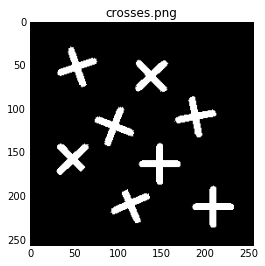

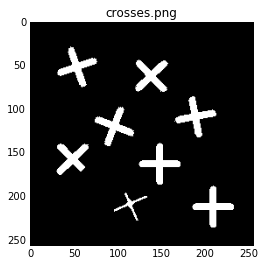

In [22]:
crosses = rg(files[13])
spheres = rg(files[35])

def labelConnectedComponents(img):#, adjacency):
    ret,thresh = cv2.threshold(img, 127, 255, 0)
    im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
    cnt = contours[4]
    new = cv2.drawContours(im2, contours, 0, (0,255,0), 3)
    
    mplt.figure()
    mplt.imshow(im2, cmap='gray')
    mplt.title(files[13])
    
mplt.imshow(crosses, cmap='gray')
mplt.title(files[13])
mplt.show()

labelConnectedComponents(crosses)

## Problem 4

The blog ‘Steve on Image Processing’ contains useful information about image processing with MATLAB. One of Steve’s posts talks about using morphological operations to identify characters containing a tall vertical segment. The post is at:
http://blogs.mathworks.com/steve/2008/07/14/opening-by-reconstruction/

Replicate the results with Python and OpenCV. You may find that the functions <tt>cv2.findContours</tt> and <tt>cv2.floodFill</tt> are useful for this.

### Análisis

El proceso mostrado en el blog de Matlab se reduce a los siguientes pasos:

* Hacer eroción de la imagen con un elemento estructurante vertical,
* Rellenar las letras que coincidan con el resultado de la erosión (en esos puntos)

El primero de los dos pasos es idéntico en Python: se crea una columna de unos (de largo 51) y se erosiona la imagen con esta columna como elemento estructurante. Hasta ahora los resultados obtenidos son idénticos a aquellos del blog de Matlab. La idea siguiente es hacer un rellenado de las letras partiendo de los puntos que quedaron luego de hacer la erosión. Para esto recuperamos los puntos en una lista (de puntos) valiéndonos de la función `nonzero` de numpy. Usando estos puntos como base se llama a la función `cv2.floodFill`; esta función recibe como parámetros una imagen de salida, una máscara, un punto para comenzar a rellenar y el color de relleno. Por alguna razón el punto se tiene que dar al reves ([y,x] en vez de [x,y]); la máscara es la imagen original invertida, esto es porque `floodFill` se detiene cuando encuentra fronteras de unos, por lo tanto las letras no pueden ser blancas.

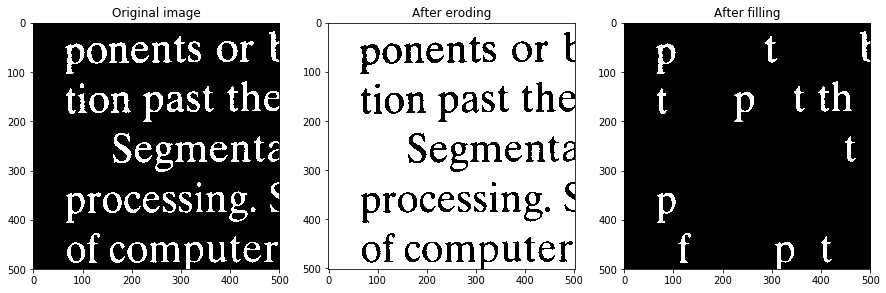

In [3]:
# Get image
img = rg(files[40])

# Erode image
ero_element = np.ones([51, 1], np.uint8)
img_ero = cv2.erode(img, ero_element, iterations = 1)

# Creating mask
mask = img.copy()
mask = cv2.bitwise_not(mask)
mask = np.pad(mask, 1, 'constant')

h, w = img.shape
img_filled = np.zeros([h, w], np.uint8)

non_zeros = np.transpose(np.nonzero(img_ero))

for n in non_zeros:
    cv2.floodFill(img_filled, mask, tuple([n[1], n[0]]), 255)

# Printing
f, ax = mplt.subplots(1, 3, figsize=(15,15))
    
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('After eroding')

ax[2].imshow(img_filled, cmap='gray')
ax[2].set_title('After filling')


## Problem 5 

Write a function that detects edges in an image using Canny’s method, which is available in the function <tt>cv2.Canny</tt>.
Your function should first smooth the image using a Guassian filter, which you can do with <tt>cv2.GaussianBlur</tt>.
Try out Canny's method with different sizes the smoothing kernel and analyze the results.
Also, try changing the thresholds in the edge detection process. What are the effects of each parameter?

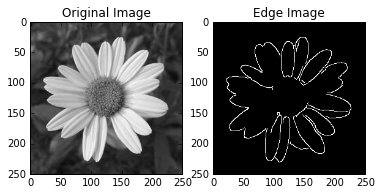

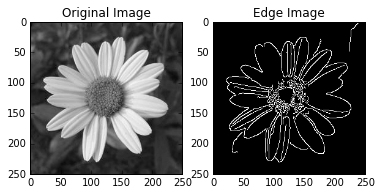

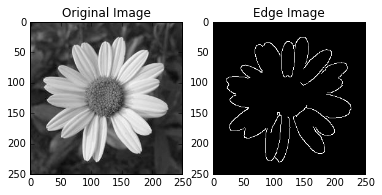

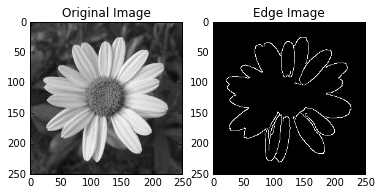

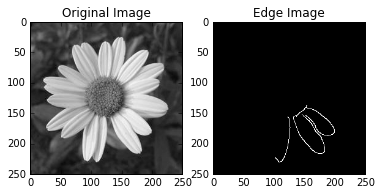

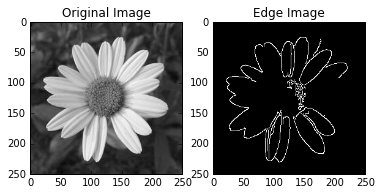

In [2]:
img = rg(files[18])

def Detector(img, kernel, minT, maxT):
    smooth = cv2.GaussianBlur(img, (kernel,kernel), 0) #(input_image, kernel(odd number))
    edges = cv2.Canny(smooth, minT, maxT) #(input_image, minValTh, maxValTh)
    
    mplt.subplot(121)
    mplt.imshow(img, cmap = 'gray')
    mplt.title('Original Image')
    
    mplt.subplot(122)
    mplt.imshow(edges, cmap = 'gray')
    mplt.title('Edge Image')
    mplt.show()

Detector(img, 5, 5, 200)
Detector(img, 3, 5, 200)

Detector(img, 5, 100, 400)
Detector(img, 3, 100, 400)

Detector(img, 5, 50, 600)
Detector(img, 3, 50, 600)

## Problem 6

Write a function that uses the Hough Transform algorithm for line detection. You can use the implementation available in OpenCV <tt>cv2.HoughLines</tt> in your function. Note that this function returns lines in the $(\rho, \theta)$ space, so you need to perform the appropiate conversions before plotting them.

Run the line detection function on an edge map obtained using Canny's method. Display the detected lines on top of the input image. You should use several images for your tests, including <tt>building.jpg</tt>.

### Análisis

La función de la transformación de Hough, llamada `houghTransform` recibe como parámetros la imagen de bordes (binaria) y una imagen en color. Con esto calcula las líneas de Hough; cabe notar que la implementación utilizada del algoritmo es la probabilística, ya que la versión simple arroja mucho ruido. Las líneas encontradas se convierten al espacio cartesiano con `cv2.line` que a la vez las agrega a la imagen original en el canal de verde. Cabe notar que la función `houghTransform` depende severamente de la función `cv2.Canny` que es la que obtiene los bordes; dependiendo de los umbrales que se seleccionen en el `Canny`, así será el número de líneas encontrado. Para que la imagen de salida fuera decente se redujo la región de selección del `Canny` lo máximo posible. Se comprobaron los resultados con otras imágenes (como `cameraman.jpg`) y se llego a resultados aceptables (detecto las líneas del trípode de la cámara).

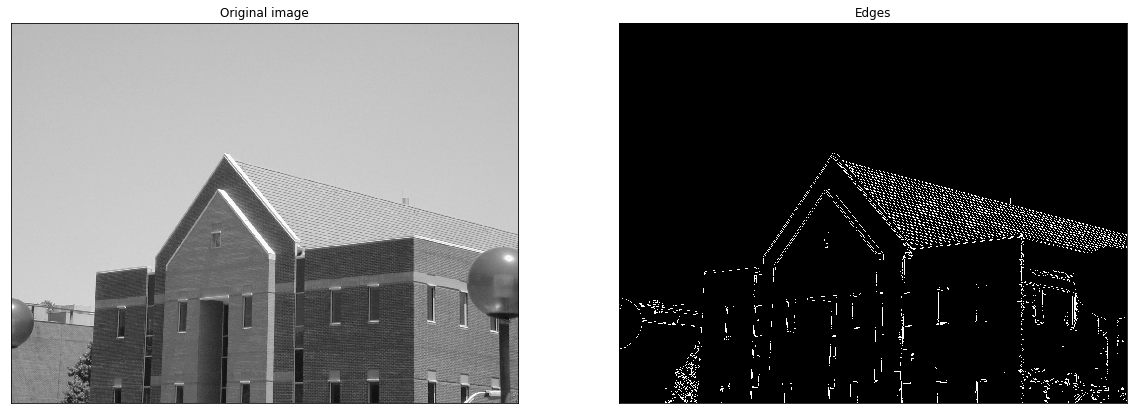

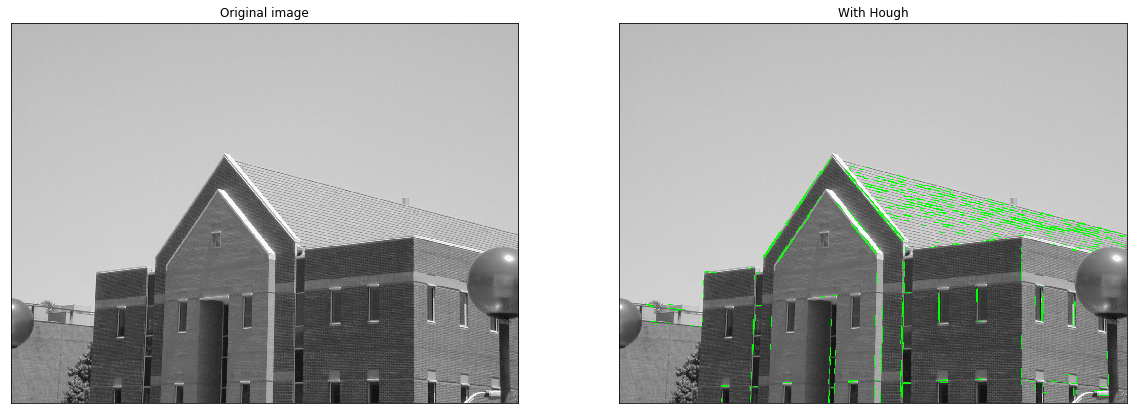

In [53]:
def houghTransform(edges, image):
    minLineLength = 100
    maxLineGap = 10
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    for x1,y1,x2,y2 in lines[0]:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

# read image
img = cv2.imread(pth + files[5])
gray = rg(files[5])

imgc = img.copy()

# Get edges
img_canny = cv2.Canny(gray, 100, 250)

# Hough transform
houghTransform(img_canny, imgc)

# Printing
f, ax = mplt.subplots(1, 2, figsize=(20,20))
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
    
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original image')

ax[1].imshow(img_canny, cmap='gray')
ax[1].set_title('Edges')

f, ax = mplt.subplots(1, 2, figsize=(20,20))
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
    
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original image')

ax[1].imshow(cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB))
ax[1].set_title('With Hough')


## Problem 7

Write a function that implements a simple adaptive thresholding algorithm as described below:

1. Select an initial estimate for $T$. A good initial value for $T$ would be equal to the average of the maximum and minimum intensity value of the image.
2. Threshold the image using $T$. This produces two groups: $G_1$, with pixels whose intensity is equal or less than $T$; and $G_2$, with pixels whose intensity is greater than $T$.
3. Compute the intensity averages $\mu_1$ and $\mu_2$ for the pixels in regions $G_1$ and $G_2$.
4. Compute a new threshold value
\begin{equation}
T=\frac{\mu_1 + \mu_2}{2}
\end{equation}

5. Repeat steps 2-4 until the difference in $T$ between successive iterations is less than a predefined parameter $T_0$.

Apply your function to the image <tt>fingerprint.jpg</tt>. Analyze your results.


### Análisis

La idea del Threshold adaptativo es que el valor de umbral sea lo más centralizado posible respecto a la intensidad general de la imagen; esto es, los valores menores y mayores que él tengan un mismo valor de intensidad media sin importar cuántas iteraciones se repita el proceso. Para ello se diseñó la función adaptativeThresholding, que es una función recursiva que itera hasta que las sucesiones de T (valor de umbral) den prácticamente igual. Lo primero que se hace es calcular un valor inicial (promedio entre el máximo y el mínimo), luego se llama a la función de umbralización. Esta umbraliza la imagen con este valor y obtiene la media de las dos regiones de intensidades (menor y mayor que el umbral), con este valor se calcula el nuevo valor de umbral. Si este valor se diferencia del anterior en menos de un margen dado se detiene la ejecución, si no, se repite el proceso con el nuevo umbral. Con las imagen `fingerprint.jpg`, el proceso converge en 2 iteraciones.

40
57.9198776042


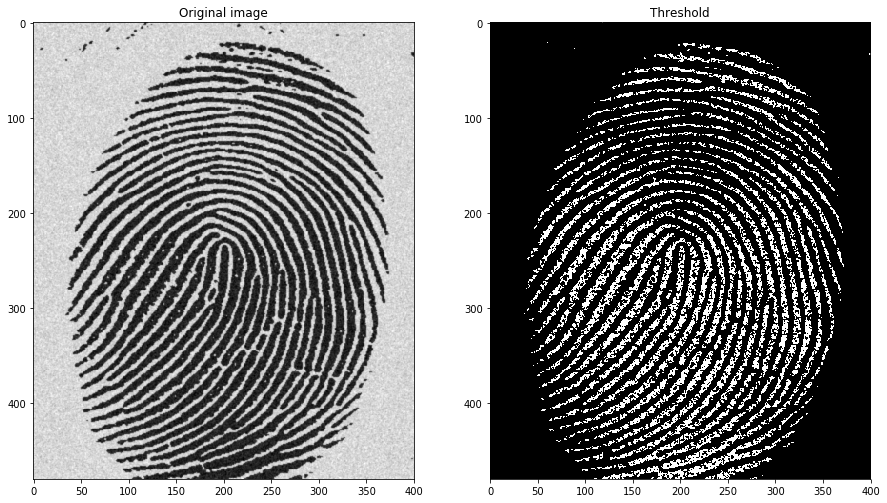

In [47]:
def adaptativeThresholding(img, T, TP, E):
    _, t = cv2.threshold(img, T, 255, cv2.THRESH_BINARY_INV)
    g1_mean = np.mean(t*img)
    g2_mean = np.mean(cv2.bitwise_not(t)*img)
    
    TP = T
    T = (g1_mean + g2_mean)/2
    
    if np.abs(TP - T) > e:
        return adaptativeThresholding(img, T, TP, E)
    else:
        return t

# Read image
image = rg(files[17])

# Initial threshold value
ti = (np.max(image)+np.min(image))/2

# Epsilon
e = 1e-3

# Threshold
th = adaptativeThresholding(image, ti, 0, e)

# Printing
f, ax = mplt.subplots(1, 2, figsize=(15,15))
    
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(th, cmap='gray')
ax[1].set_title('Threshold')


## Problem 8

Write a function that uses the $k$-means algorithm to perform image segmentation using RGB pixel colors as features.
Write also a variant of this segmentation approach that uses the H and S components of each pixel represented in the HSI color space. Here, you should use normalized H and S values, so that both variables range between 0 and 1.
Apply your functions to the image <tt>mms.jpg</tt>. Select an appropriate value of $k$.
